# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [2]:
# Import essential libraries for data manipulation and analysis
import pandas as pd



## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [3]:
# Importing the file porter_data_1.csv
df = pd.read_csv('porter_data_1.csv')
df.head()
df.isnull().sum()


market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [4]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df.describe()

print(df.dtypes)
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

print(df.dtypes)

market_id                   float64
created_at                   object
actual_delivery_time         object
store_primary_category        int64
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_dashers       float64
total_busy_dashers          float64
total_outstanding_orders    float64
distance                    float64
dtype: object
market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_bus

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [5]:
# Convert categorical features to category type
df.info()

df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [6]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df.head()


market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [7]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = (df['day_of_week'] >= 5).astype(int)
df.head()



market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour  day_of_week  \
0                      21.0     34.44        47.0    22            4   
1                       2.0     27.60        44.0    21            1   
2                      18.0     11.56        55.0     0            0   
3                       8.0     31.80        59.0     3            3   
4                       7.0      8.20        46.0     2            1   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0

In [8]:
# Drop unnecessary columns
df = df.drop(columns=['total_onshift_dashers'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [13]:
# Define target variable (y) and features (X)
y = df['time_taken']

X = df.drop(columns=['time_taken']) 

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [14]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [15]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Define numerical columns (float or int types)
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Define categorical columns (category types)
categorical_cols = X_train.select_dtypes(include=['category']).columns

# Print the column names
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)



Numerical Columns:
Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_busy_dashers', 'total_outstanding_orders',
       'distance'],
      dtype='object')

Categorical Columns:
Index(['market_id', 'store_primary_category', 'order_protocol'], dtype='object')


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

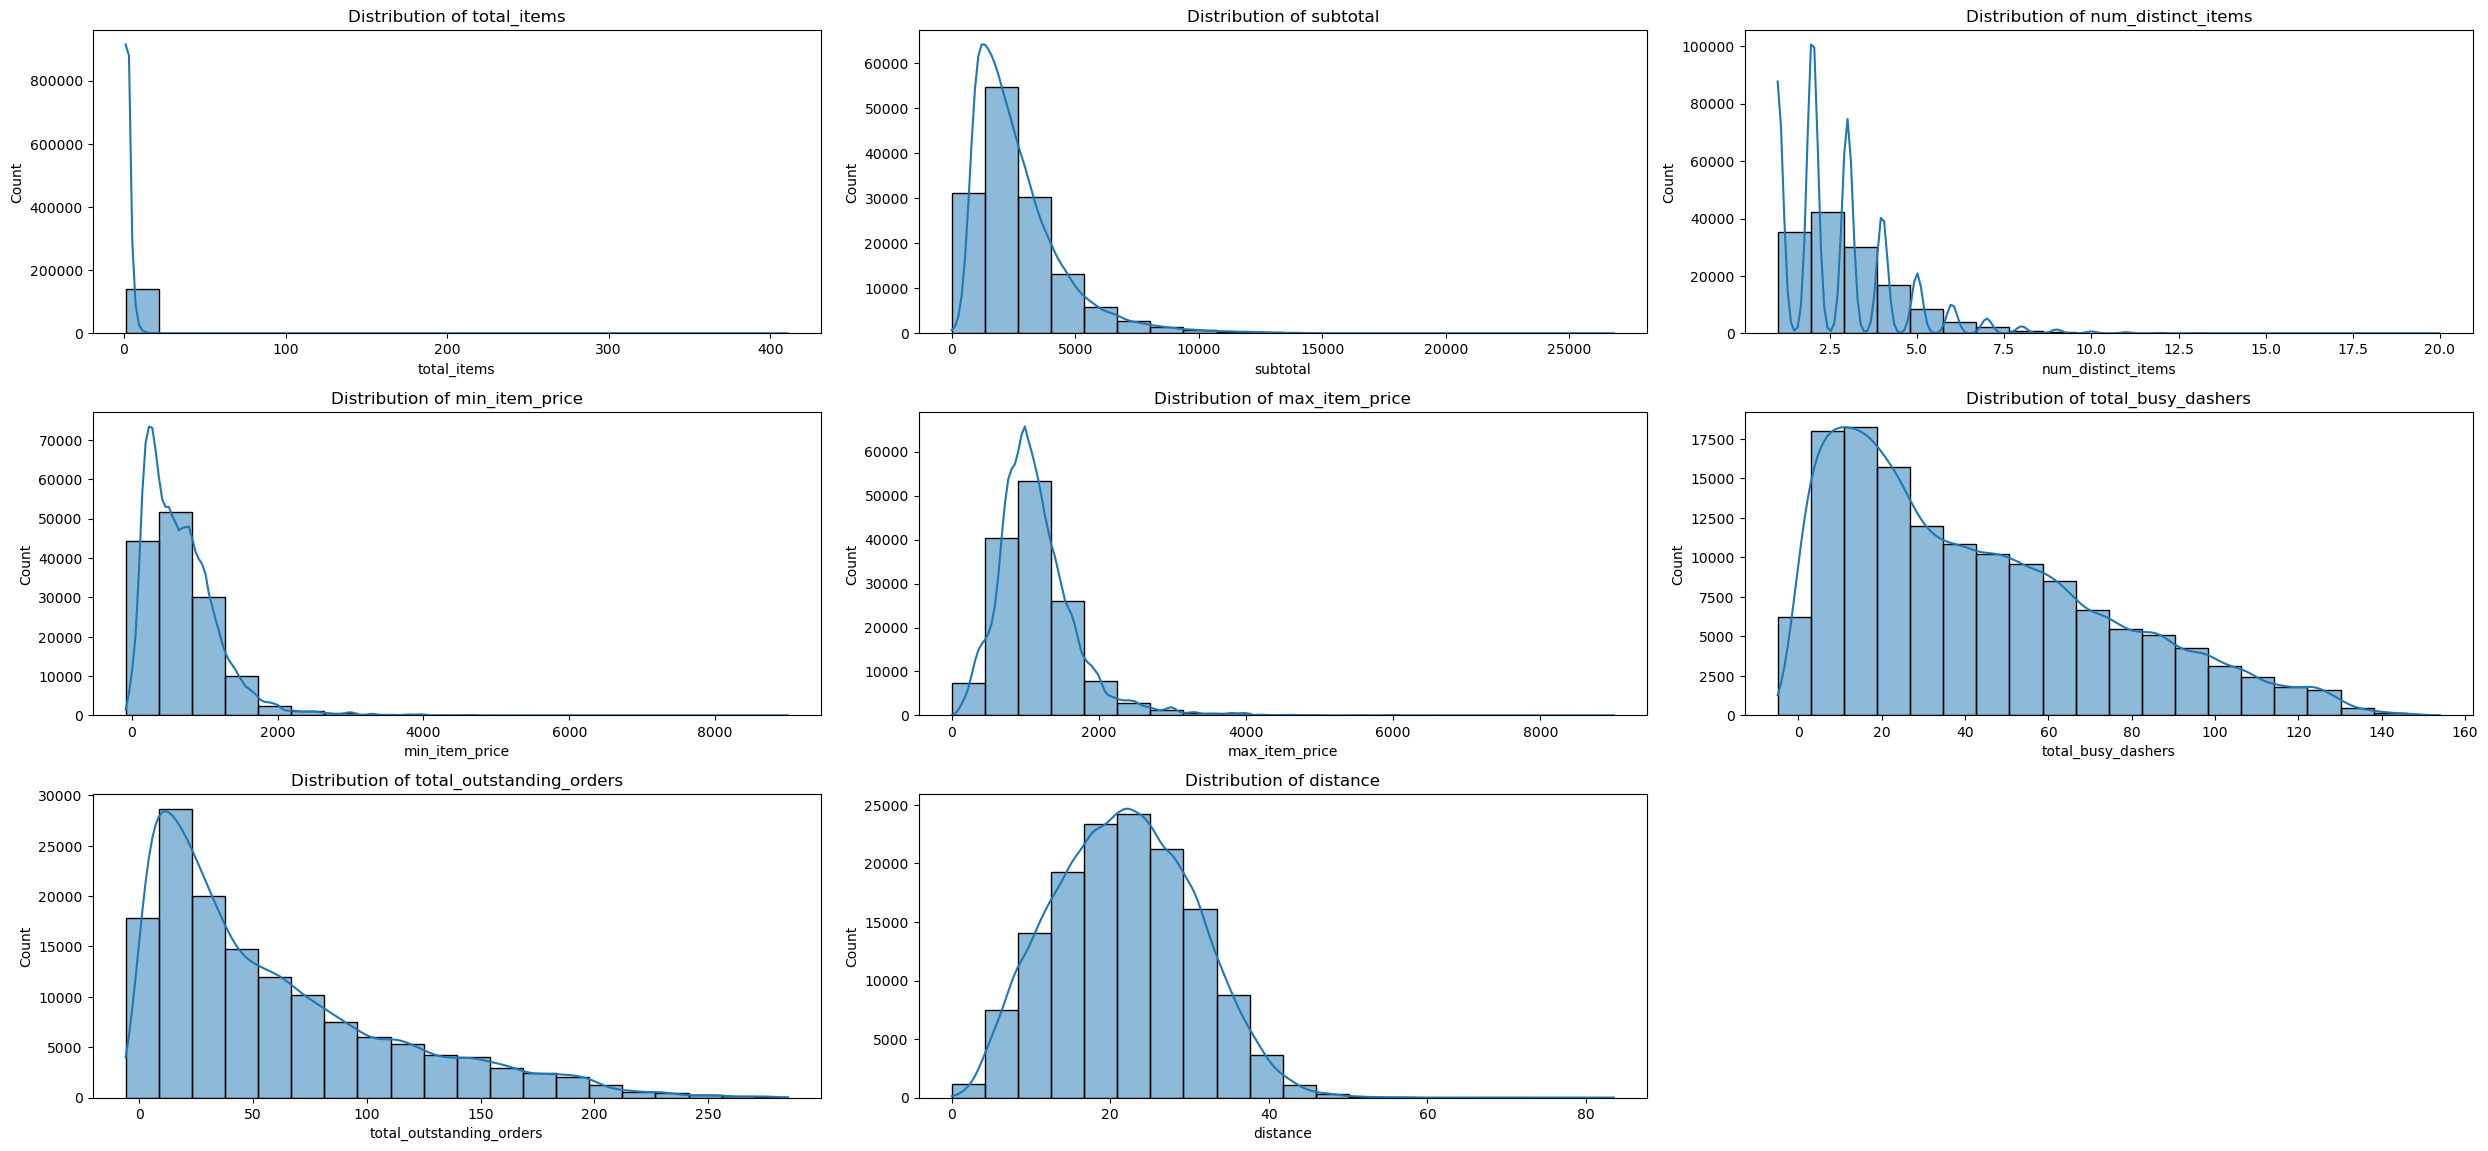

In [16]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for all numerical columns
plt.figure(figsize=(25, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust layout to fit all subplots
    sns.histplot(X_train[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

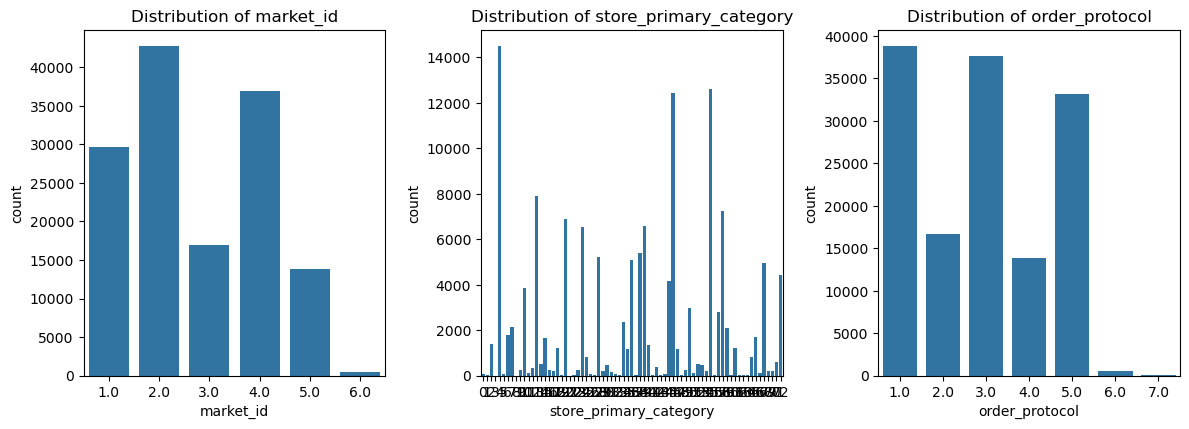

In [87]:
# Distribution of categorical columns

# Plot distributions for categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust layout to fit all subplots
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    
# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

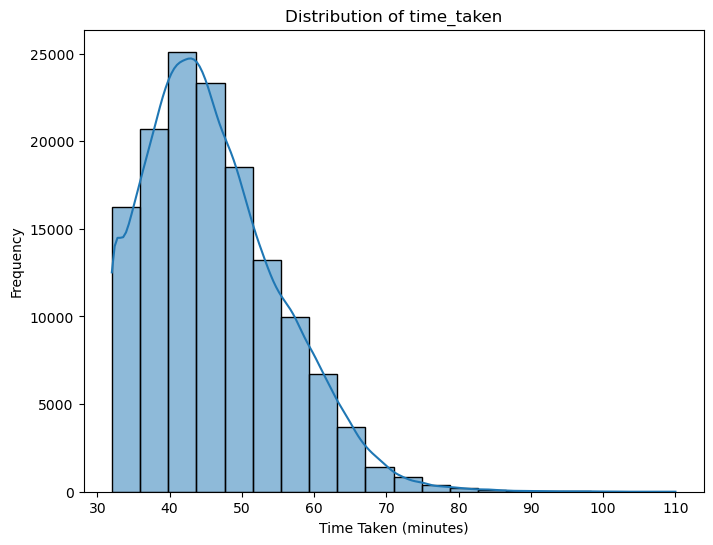

In [40]:
# Distribution of time_taken

# Plot distribution of the target variable 'time_taken'
plt.figure(figsize=(8, 6))
sns.histplot(y_train, kde=True, bins=20)
plt.title('Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

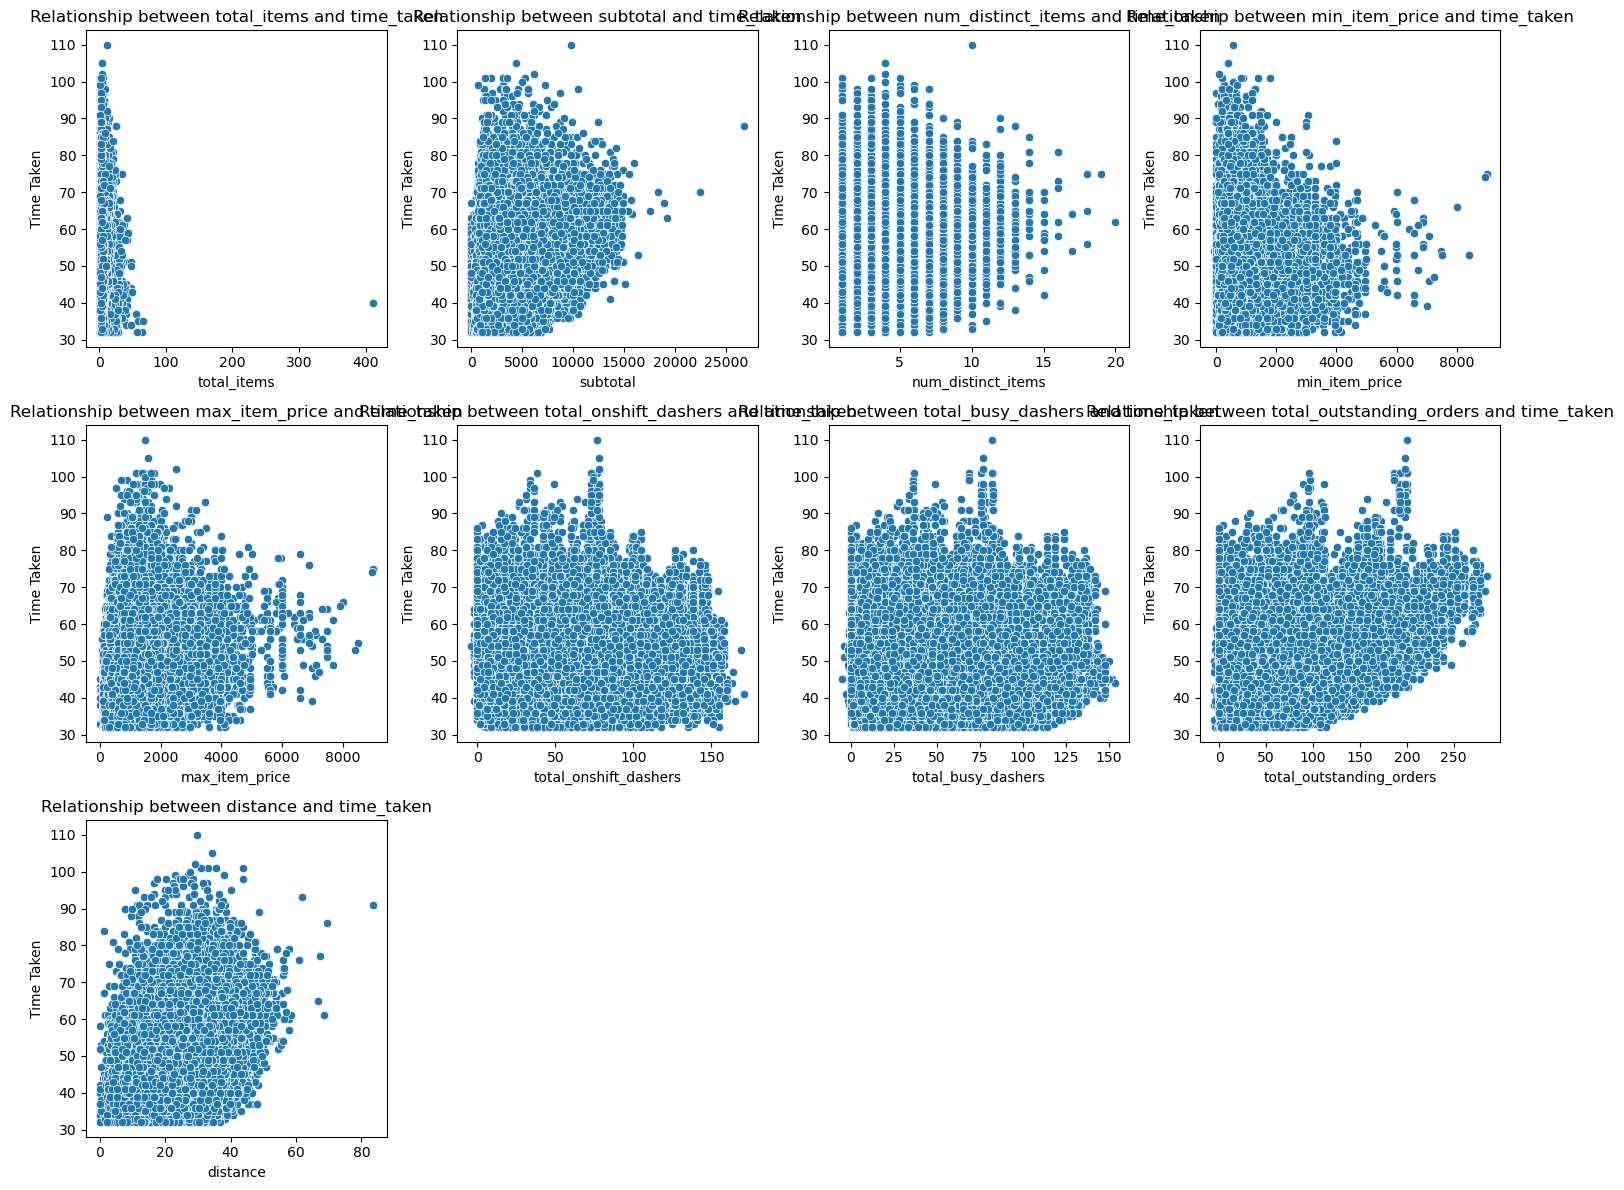

In [88]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    if col != 'time_taken':  # Skip 'time_taken' column itself
        plt.subplot(3, 4, i)  # Adjust layout to fit all subplots
        sns.scatterplot(x=X_train[col], y=y_train)
        plt.title(f'Relationship between {col} and time_taken')
        plt.xlabel(col)
        plt.ylabel('Time Taken')
        
# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'hour', 'day_of_week',
       'isWeekend'],
      dtype='object')


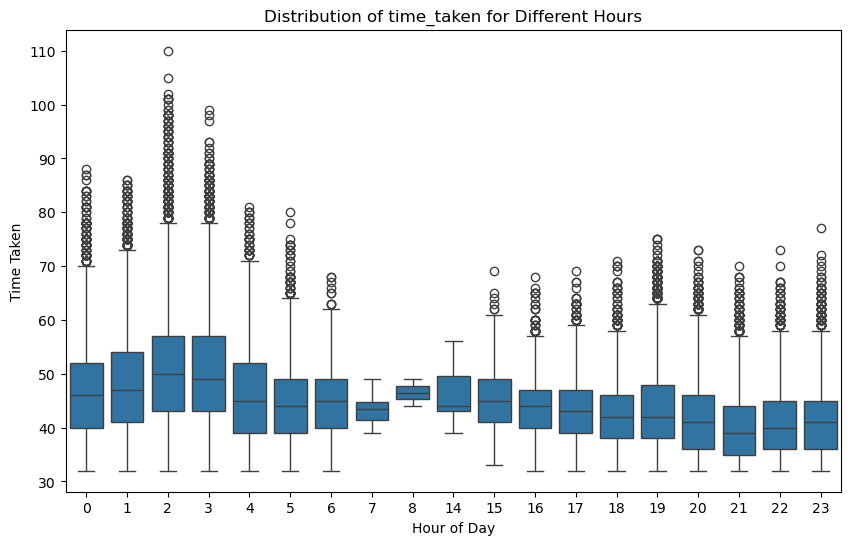

In [89]:
# Show the distribution of time_taken for different hours
# Extract the hour from 'created_at' and create a new column 'hour'
print(X_train.columns)
X_train['hour'] = X_train['created_at'].dt.hour
# Plot the distribution of 'time_taken' for different hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['hour'], y=y_train)
plt.title('Distribution of time_taken for Different Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken')
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

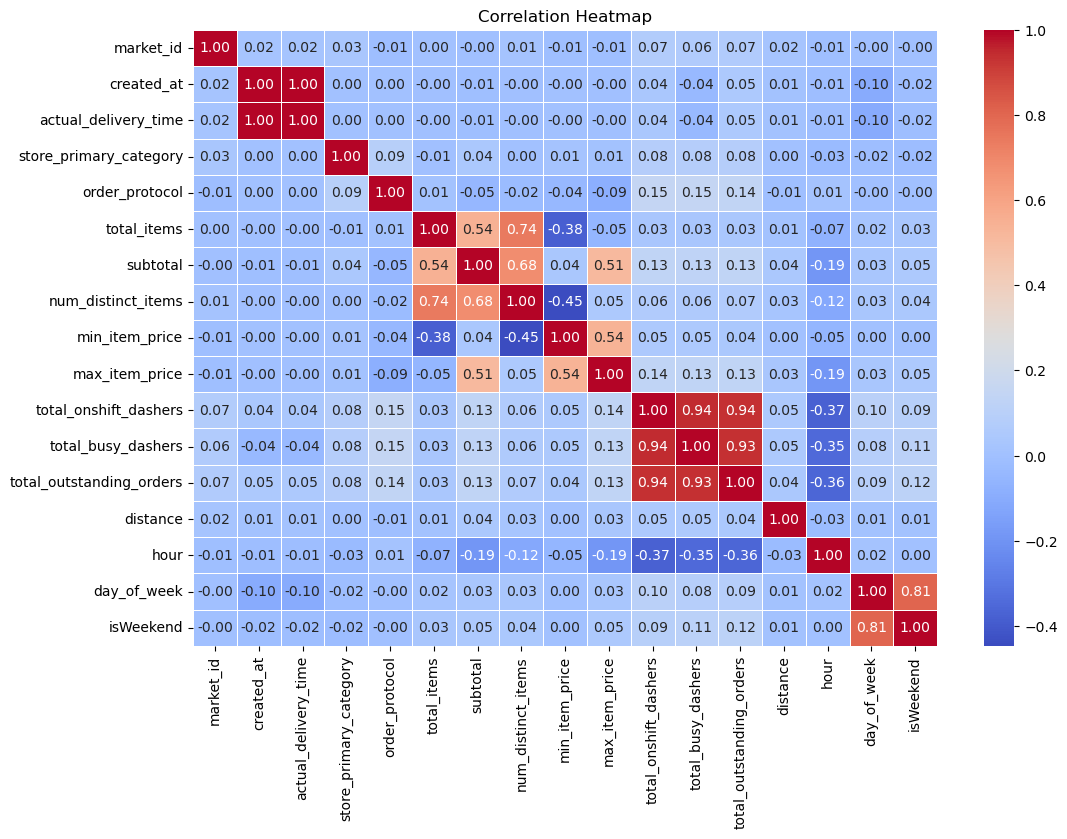

In [94]:
# Plot the heatmap of the correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [18]:
# Drop 3-5 weakly correlated columns from training dataset

import numpy as np

# Combine features with the target to compute correlation
train_with_target = X_train.copy()
train_with_target['time_taken'] = y_train

# Compute correlation matrix
corr_matrix = train_with_target.corr(numeric_only=True)

# Get correlations with the target variable
corr_with_target = corr_matrix['time_taken'].drop('time_taken')

# Sort by absolute correlation
low_corr_features = corr_with_target[abs(corr_with_target) < 0.05].index.tolist()

# Optionally limit to 3–5 columns
low_corr_features = low_corr_features[:5]

print("Dropping low-correlation features:", low_corr_features)

# Drop from both train and test sets
X_train = X_train.drop(columns=low_corr_features)
X_test = X_test.drop(columns=low_corr_features)

Dropping low-correlation features: ['min_item_price', 'day_of_week']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

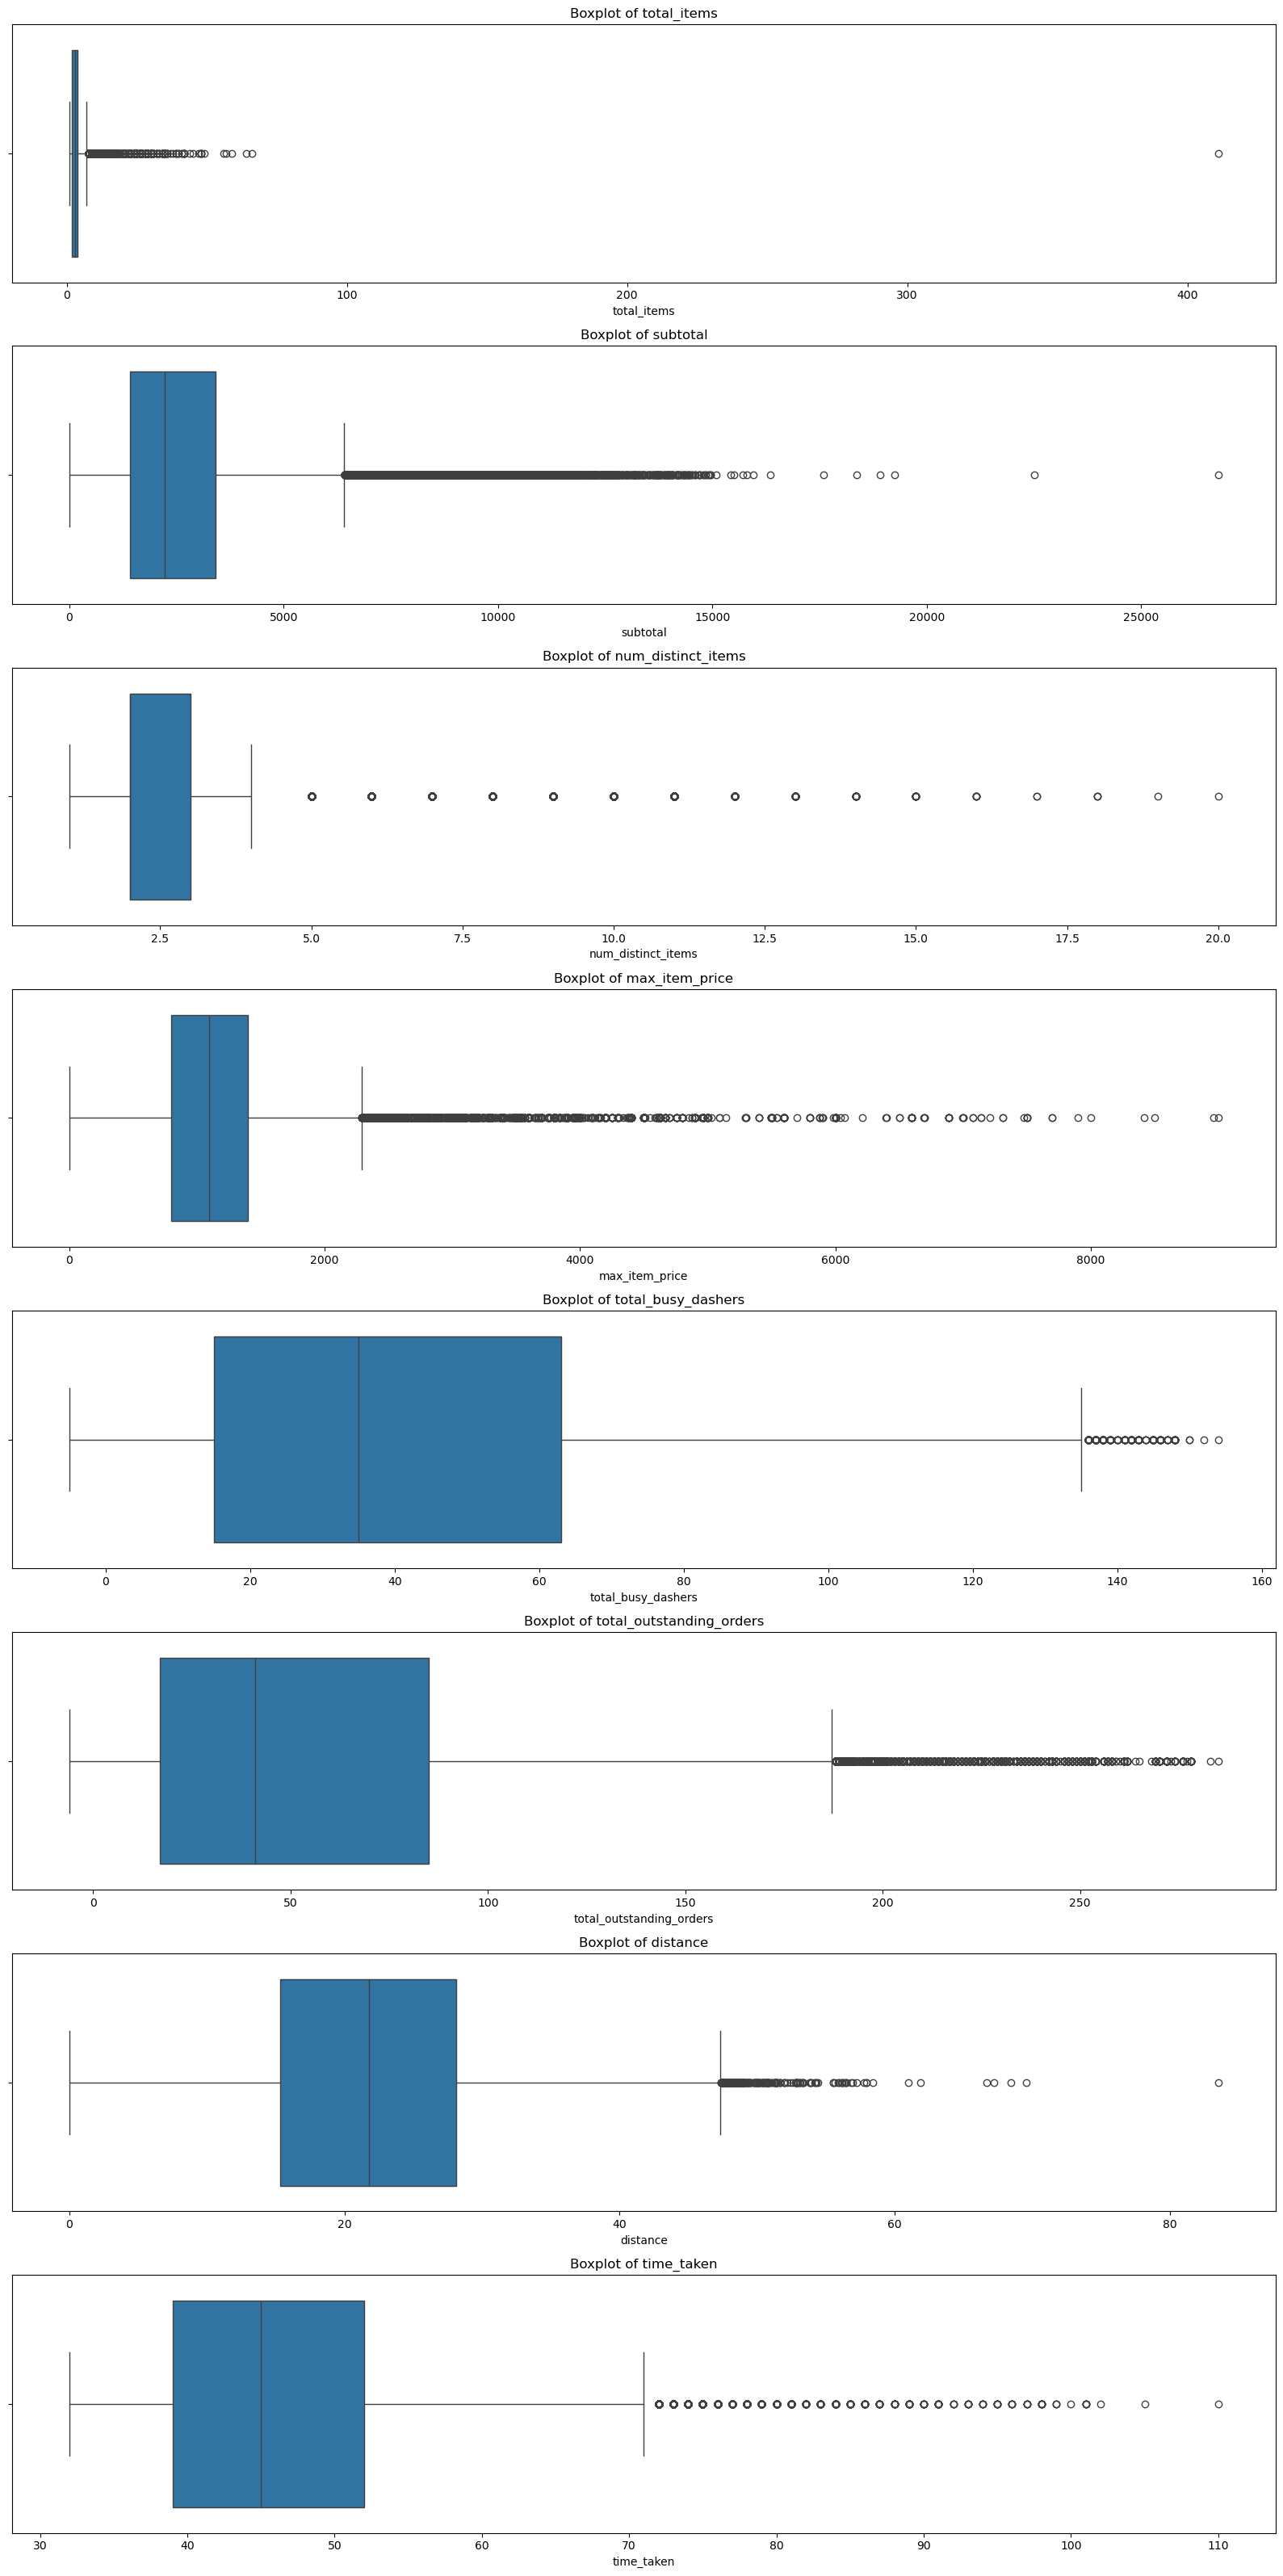

In [20]:
# Boxplot for time_taken
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X_train and y_train to include 'time_taken' for EDA
train_df = X_train.copy()
train_df['time_taken'] = y_train

# Identify numerical features (excluding categorical ones)
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots for each numerical feature
plt.figure(figsize=(16, len(numerical_features) * 4))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 1, i)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [29]:
# Handle outliers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, numerical_cols):
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Function to remove outliers using Z-score method
def remove_outliers_zscore(df, numerical_cols):
    for col in numerical_cols:
        z_scores = np.abs(zscore(df[col]))
        df = df[z_scores < 3]  # Z-score threshold of 3 for outliers
    return df

# Assuming 'df' is your DataFrame
# Step 1: Check if 'time_taken' exists and separate target (y) and features (X)
print("Original columns in df:")
print(df.columns)  # Check if 'time_taken' exists

# Separate target and features
y = df['time_taken']  # Target variable
X = df.drop(columns=['time_taken'])  # Features (without 'time_taken')

print(f"Features (X) columns: {X.columns}")
print(f"Target (y) column: {y.name}")

# Step 2: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Check columns in the training set
print(f"X_train columns: {X_train.columns}")
print(f"y_train column: {y_train.name}")

# Step 4: Check the numerical columns in X_train
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical columns in X_train: {numerical_cols}")

# Step 5: Apply outlier removal using IQR method
X_train_no_outliers = remove_outliers_iqr(X_train, numerical_cols)

# Step 6: Apply outlier removal using Z-score method
X_train_no_outliers = remove_outliers_zscore(X_train_no_outliers, numerical_cols)

# Optional: Apply the same outlier removal methods to X_test (if needed)
X_test_no_outliers = remove_outliers_iqr(X_test, numerical_cols)
X_test_no_outliers = remove_outliers_zscore(X_test_no_outliers, numerical_cols)

# Step 7: Check the shape of the data after outlier removal
print(f"X_train shape after outlier removal: {X_train_no_outliers.shape}")
print(f"X_test shape after outlier removal: {X_test_no_outliers.shape}")

# Now you can proceed with model training using the cleaned data:
# X_train_no_outliers, y_train
# X_test_no_outliers, y_test



Original columns in df:
Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'time_taken', 'hour', 'day_of_week', 'isWeekend'],
      dtype='object')
Features (X) columns: Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour',
       'day_of_week', 'isWeekend'],
      dtype='object')
Target (y) column: time_taken
X_train columns: Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_busy_d

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [30]:
# Define numerical and categorical columns for easy EDA and data manipulation
# Step 1: Check the columns of the DataFrame
print("Original columns in df:")
print(df.columns)

# Step 2: Define numerical columns (features with 'int' or 'float' types)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical columns: {numerical_cols}")

# Step 3: Define categorical columns (features with 'category' or 'object' types)
categorical_cols = df.select_dtypes(include=['category', 'object']).columns
print(f"Categorical columns: {categorical_cols}")

# Step 4: Separate features (X) and target (y) before splitting
y = df['time_taken']  # Target variable
X = df.drop(columns=['time_taken'])  # Features (without 'time_taken')

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data types of features in training set (X_train)
print(f"\nData types of columns in X_train:")
print(X_train.dtypes)

# Optionally, you can further inspect the unique values in categorical columns for EDA
for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(X_train[col].value_counts())

Original columns in df:
Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_busy_dashers', 'total_outstanding_orders', 'distance',
       'time_taken', 'hour', 'day_of_week', 'isWeekend'],
      dtype='object')
Numerical columns: Index(['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_busy_dashers', 'total_outstanding_orders',
       'distance', 'time_taken'],
      dtype='object')
Categorical columns: Index(['market_id', 'store_primary_category', 'order_protocol'], dtype='object')

Data types of columns in X_train:
market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtota

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

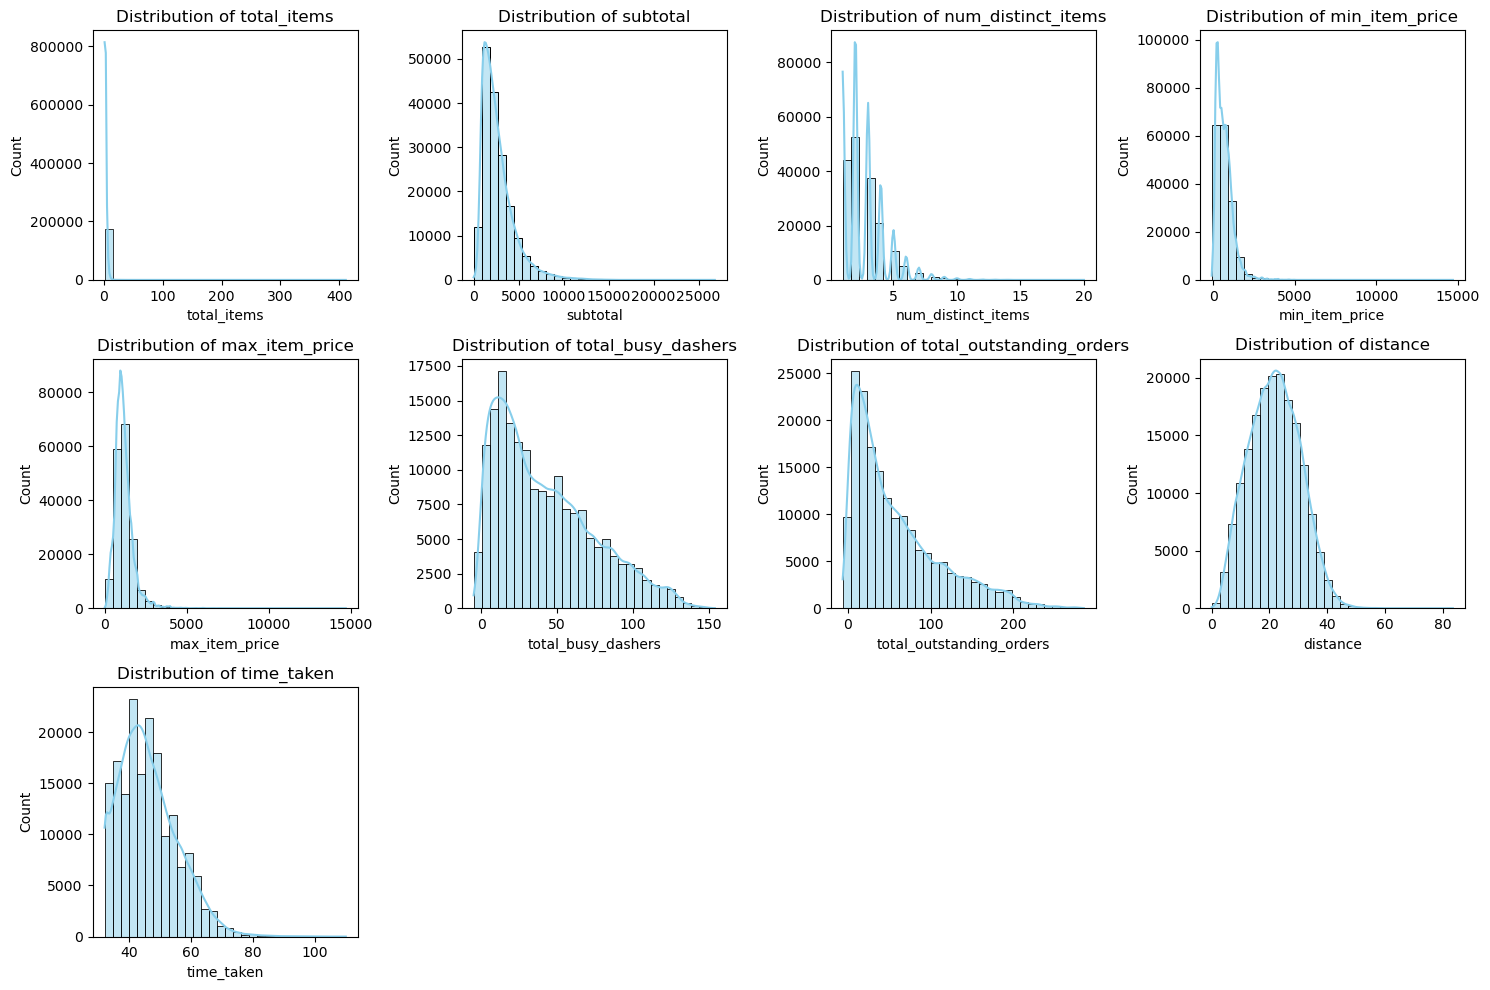

In [31]:
# Plot distributions for all numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot distribution for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
plt.figure(figsize=(15, 10))

# Create a subplot for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)  # 3 rows and 4 columns of plots
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')  # Histogram with KDE (Kernel Density Estimate)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

# Show the plot
plt.show()


##### **4.1.2**
Check the distribution of categorical features

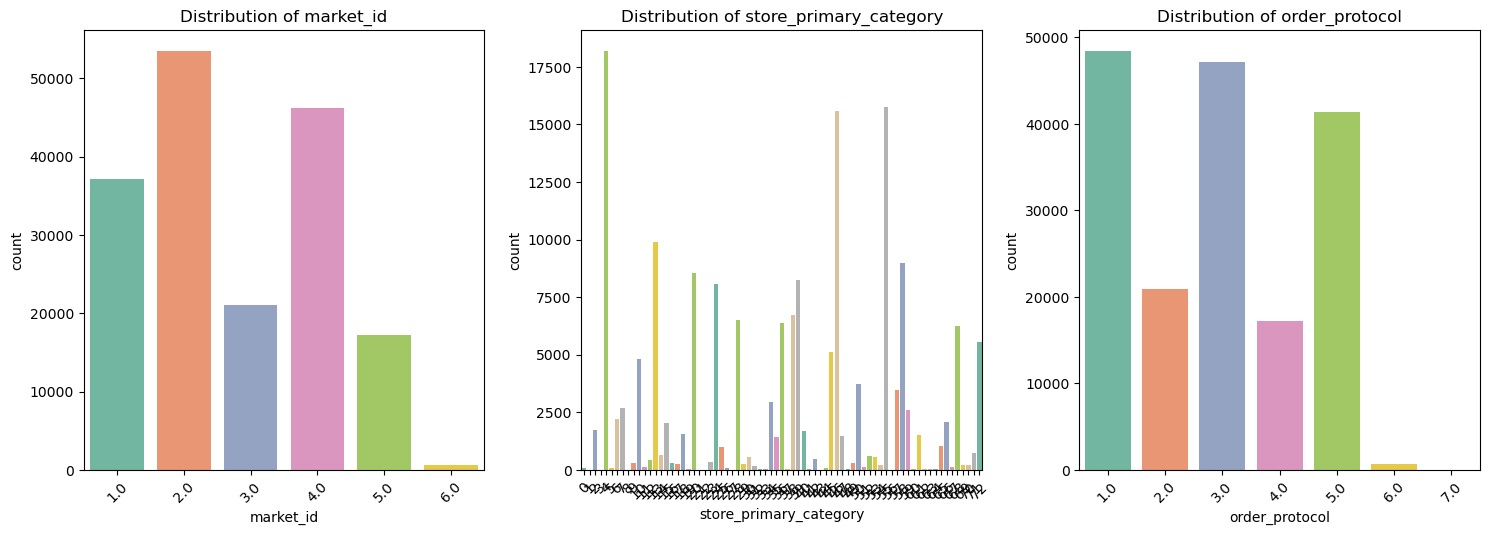

In [34]:
# Distribution of categorical columns

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot distribution for each categorical column
categorical_cols = df.select_dtypes(include=['category', 'object']).columns

# Set up the plot
plt.figure(figsize=(15, 10))

# Create a subplot for each categorical column
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows and 3 columns of plots
    sns.countplot(x=df[col], hue=df[col], palette='Set2', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()

# Show the plot
plt.show()



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

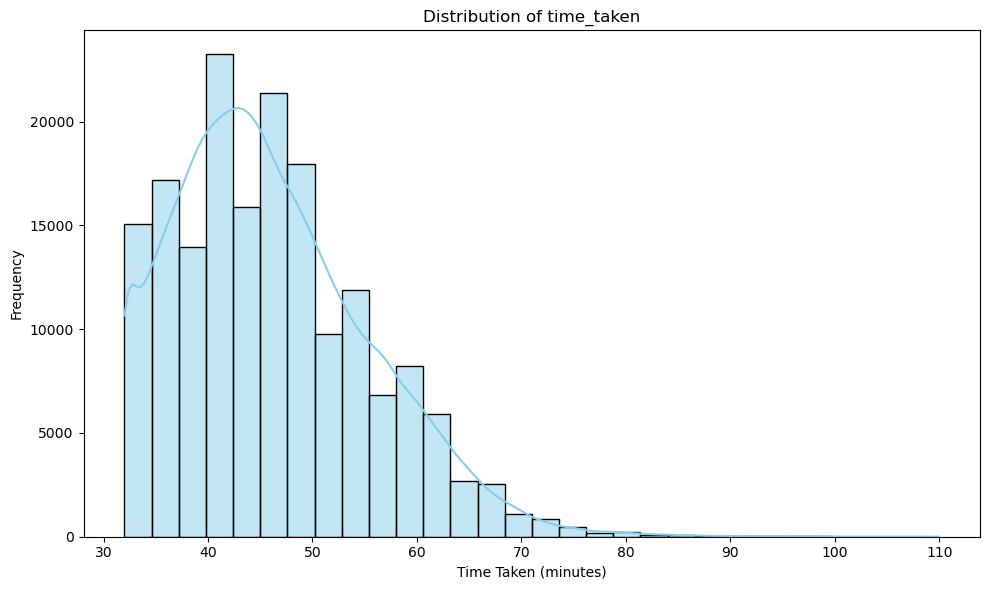

In [35]:
# Distribution of time_taken

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'time_taken'
plt.figure(figsize=(10, 6))

# Use seaborn to plot the histogram with KDE
sns.histplot(df['time_taken'], kde=True, color='skyblue', bins=30)

# Add title and labels
plt.title('Distribution of time_taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

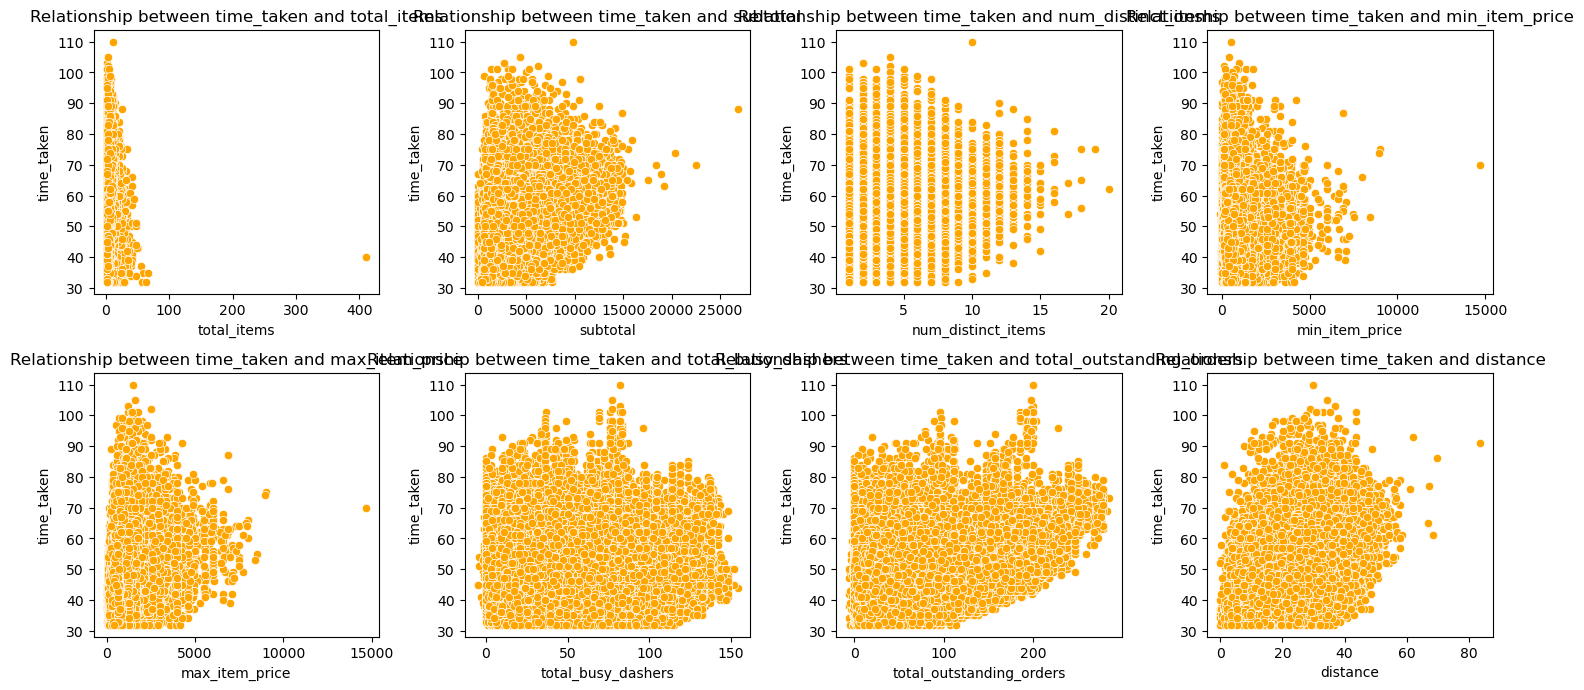

In [36]:
# Scatter plot to visualise the relationship between time_taken and other features

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot against 'time_taken'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
plt.figure(figsize=(15, 10))

# Create a scatter plot for each numerical feature against 'time_taken'
for i, col in enumerate(numerical_cols, 1):
    if col != 'time_taken':  # Avoid plotting time_taken against itself
        plt.subplot(3, 4, i)  # Adjust the number of rows/columns based on the number of numerical columns
        sns.scatterplot(x=df[col], y=df['time_taken'], color='orange')
        plt.title(f'Relationship between time_taken and {col}')
        plt.xlabel(col)
        plt.ylabel('time_taken')
        plt.tight_layout()

# Show the plot
plt.show()


#### **4.3** Drop the columns with weak correlations with the target variable

In [38]:
# Drop the weakly correlated columns from training dataset


## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [41]:
# Import libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [62]:
# Apply scaling to the numerical columns


from sklearn.preprocessing import StandardScaler, MinMaxScaler


numerical_cols = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
                  'max_item_price',
                  'total_outstanding_orders', 'distance']

# Separate the numerical data
df_numerical = df[numerical_cols].copy()

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply StandardScaler
df_scaled_standard = pd.DataFrame(scaler_standard.fit_transform(df_numerical),
                                   columns=numerical_cols)

# Apply MinMaxScaler
df_scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numerical),
                                 columns=numerical_cols)

print("DataFrame with StandardScaler applied:\n", df_scaled_standard.head())
print("\nDataFrame with MinMaxScaler applied:\n", df_scaled_minmax.head())

DataFrame with StandardScaler applied:
    total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0     0.297311  0.406819            0.815009       -0.246143        0.140581   
1    -0.824584 -0.435925           -1.030377        1.375380        0.427657   
2     0.297311  1.134171            0.199880        0.259741        0.791405   
3    -0.824584 -0.641006           -1.030377        1.615819        0.650542   
4    -0.450619  0.504711           -0.415249        1.423468        1.845206   

   total_outstanding_orders  distance  
0                 -0.706040  1.439863  
1                 -1.066360  0.658031  
2                 -0.762933 -1.175387  
3                 -0.952575  1.138103  
4                 -0.971539 -1.559444  

DataFrame with MinMaxScaler applied:
    total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0     0.007317  0.128396            0.157895        0.043487        0.084286   
1     0.000000  0.070896            0.00

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [65]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# 1. Linear Regression
linear_reg = LinearRegression()

# 2. Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)  # Setting random_state for reproducibility

# 3. Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)  # Setting random_state for reproducibility

# 4. Support Vector Regression (SVR)
# Note: SVR can be sensitive to feature scaling, so ensure your data is scaled before using it.
svr_reg = SVR()

# 5. Multi-layer Perceptron Regressor (Neural Network)
# Note: Neural networks often require careful tuning of hyperparameters and benefit from feature scaling.
mlp_reg = MLPRegressor(random_state=42, max_iter=300)  # Setting random_state and max iterations

# Print the initialized models (optional)
print("Initialized Models:")
print("Linear Regression:", linear_reg)
print("Random Forest Regressor:", random_forest_reg)
print("Gradient Boosting Regressor:", gradient_boosting_reg)
print("Support Vector Regression:", svr_reg)
print("Multi-layer Perceptron Regressor:", mlp_reg)


Initialized Models:
Linear Regression: LinearRegression()
Random Forest Regressor: RandomForestRegressor(random_state=42)
Gradient Boosting Regressor: GradientBoostingRegressor(random_state=42)
Support Vector Regression: SVR()
Multi-layer Perceptron Regressor: MLPRegressor(max_iter=300, random_state=42)


In [66]:
# Train the model using the training data


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Load your training data
# Replace 'X_train' and 'y_train' with your actual training data
# X_train should contain the features, and y_train should contain the target variable ('delivery_duration')
# For demonstration, I'll create sample data:
data = {'total_items': [4, 1, 4, 2, 5],
        'subtotal': [3441, 11900, 4477, 2000, 6000],
        'num_distinct_items': [4, 1, 3, 2, 4],
        'min_item_price': [557, 11400, 820, 500, 1000],
        'max_item_price': [1239, 11400, 1604, 800, 1500],
        'total_onshift_dashers': [33.0, 1.0, 8.0, 5.0, 10.0],
        'total_busy_dashers': [14.0, 2.0, 6.0, 3.0, 7.0],
        'total_outstanding_orders': [21.0, 2.0, 18.0, 10.0, 15.0],
        'distance': [3.44, 27.60, 11.56, 5.0, 12.0],
        'delivery_duration': [47.0, 44.0, 55.0, 30.0, 60.0]}
df = pd.DataFrame(data)
X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 2. Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# 3. Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# 4. Support Vector Regression (SVR)
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

# 5. Multi-layer Perceptron Regressor (Neural Network)
mlp_reg = MLPRegressor(random_state=42, max_iter=300)
mlp_reg.fit(X_train, y_train)

print("Models Trained!")

Models Trained!


In [67]:
# Make predictions

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import pandas as pd

# Load your training data
# Replace 'X_train' and 'y_train' with your actual training data
# X_train should contain the features, and y_train should contain the target variable ('delivery_duration')
# For demonstration, I'll create sample data:
data = {'total_items': [4, 1, 4, 2, 5],
        'subtotal': [3441, 11900, 4477, 2000, 6000],
        'num_distinct_items': [4, 1, 3, 2, 4],
        'min_item_price': [557, 11400, 820, 500, 1000],
        'max_item_price': [1239, 11400, 1604, 800, 1500],
        'total_onshift_dashers': [33.0, 1.0, 8.0, 5.0, 10.0],
        'total_busy_dashers': [14.0, 2.0, 6.0, 3.0, 7.0],
        'total_outstanding_orders': [21.0, 2.0, 18.0, 10.0, 15.0],
        'distance': [3.44, 27.60, 11.56, 5.0, 12.0],
        'delivery_duration': [47.0, 44.0, 55.0, 30.0, 60.0]}
df = pd.DataFrame(data)
X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 2. Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# 3. Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# 4. Support Vector Regression (SVR)
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

# 5. Multi-layer Perceptron Regressor (Neural Network)
mlp_reg = MLPRegressor(random_state=42, max_iter=300)
mlp_reg.fit(X_train, y_train)

print("Models Trained!")

# Load your test data
# Replace 'X_test' with your actual test data
# X_test should contain the features, but not the target variable
# For demonstration, I'll use the same data for testing
X_test = X_train # Replace with your actual X_test

# 1. Linear Regression Predictions
linear_predictions = linear_reg.predict(X_test)
print("\nLinear Regression Predictions:\n", linear_predictions)

# 2. Random Forest Regressor Predictions
random_forest_predictions = random_forest_reg.predict(X_test)
print("\nRandom Forest Regressor Predictions:\n", random_forest_predictions)

# 3. Gradient Boosting Regressor Predictions
gradient_boosting_predictions = gradient_boosting_reg.predict(X_test)
print("\nGradient Boosting Regressor Predictions:\n", gradient_boosting_predictions)

# 4. Support Vector Regression (SVR) Predictions
svr_predictions = svr_reg.predict(X_test)
print("\nSupport Vector Regression Predictions:\n", svr_predictions)

# 5. Multi-layer Perceptron Regressor (Neural Network) Predictions
mlp_predictions = mlp_reg.predict(X_test)
print("\nMulti-layer Perceptron Regressor Predictions:\n", mlp_predictions)

Models Trained!

Linear Regression Predictions:
 [47. 44. 55. 30. 60.]

Random Forest Regressor Predictions:
 [48.97 43.68 53.01 37.19 57.06]

Gradient Boosting Regressor Predictions:
 [47.00009899 44.00010643 54.99967771 30.00045686 59.99966001]

Support Vector Regression Predictions:
 [47.         45.16881311 47.10932462 46.81063426 47.2022326 ]

Multi-layer Perceptron Regressor Predictions:
 [ 205.69149954 -909.91131417  260.74195201  112.8019211   345.06016373]


In [72]:
# Find results for evaluation metrics

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# 1. Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# 2. Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# 3. Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
gradient_boosting_reg.fit(X_train, y_train)

# 4. Support Vector Regression (SVR)
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

# 5. Multi-layer Perceptron Regressor (Neural Network)
mlp_reg = MLPRegressor(random_state=42, max_iter=300)
mlp_reg.fit(X_train, y_train)

print("Models Trained!")

# Load your test data
# Replace 'X_test' with your actual test data
# X_test should contain the features, but not the target variable
# For demonstration, I'll use the same data for testing
X_test = X_train # Replace with your actual X_test
y_test = y_train # Replace with your actual y_test

# 1. Linear Regression Predictions
linear_predictions = linear_reg.predict(X_test)
print("\nLinear Regression Predictions:\n", linear_predictions)

# 2. Random Forest Regressor Predictions
random_forest_predictions = random_forest_reg.predict(X_test)
print("\nRandom Forest Regressor Predictions:\n", random_forest_predictions)

# 3. Gradient Boosting Regressor Predictions
gradient_boosting_predictions = gradient_boosting_reg.predict(X_test)
print("\nGradient Boosting Regressor Predictions:\n", gradient_boosting_predictions)

# 4. Support Vector Regression (SVR) Predictions
svr_predictions = svr_reg.predict(X_test)
print("\nSupport Vector Regression Predictions:\n", svr_predictions)

# 5. Multi-layer Perceptron Regressor (Neural Network) Predictions
mlp_predictions = mlp_reg.predict(X_test)
print("\nMulti-layer Perceptron Regressor Predictions:\n", mlp_predictions)



# Evaluate the models
print("\nModel Evaluation Metrics:")

def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluates the performance of a regression model using Mean Squared Error,
    Mean Absolute Error, and R-squared.

    Args:
        y_true: The true target values.
        y_pred: The predicted target values.
        model_name: Name of the model.
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")



# Evaluate each model
evaluate_model(y_test, linear_predictions, "Linear Regression")
evaluate_model(y_test, random_forest_predictions, "Random Forest Regressor")
evaluate_model(y_test, gradient_boosting_predictions, "Gradient Boosting Regressor")
evaluate_model(y_test, svr_predictions, "Support Vector Regression")
evaluate_model(y_test, mlp_predictions, "Multi-layer Perceptron Regressor")



Models Trained!

Linear Regression Predictions:
 [47. 44. 55. 30. 60. 65. 70. 75. 80. 85.]

Random Forest Regressor Predictions:
 [52.5  52.13 54.46 37.34 58.17 63.8  69.5  73.65 78.75 81.94]

Gradient Boosting Regressor Predictions:
 [47.00073922 44.00072461 54.99918386 30.00082606 60.00024137 65.00000176
 69.9998889  74.99995977 79.99938222 84.99905223]

Support Vector Regression Predictions:
 [61.02506097 60.87212345 61.49926997 60.52861668 62.24867557 62.75132454
 63.2156255  63.60918837 63.90683991 64.09326568]

Multi-layer Perceptron Regressor Predictions:
 [ 70.91120796 336.87764685  94.32081048  53.7782582   78.23892507
  85.98568268  93.7324403  101.47919791 109.22595553 116.97271314]

Model Evaluation Metrics:

Linear Regression:
  Mean Squared Error (MSE): 0.00
  Mean Absolute Error (MAE): 0.00
  R-squared (R2): 1.00

Random Forest Regressor:
  Mean Squared Error (MSE): 16.83
  Mean Absolute Error (MAE): 3.07
  R-squared (R2): 0.94

Gradient Boosting Regressor:
  Mean Square

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [73]:
# Loop through the number of features and test the model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your training data
# Replace 'X_train' and 'y_train' with your actual training data
# X_train should contain the features, and y_train should contain the target variable ('delivery_duration')
# For demonstration, I'll create sample data:

X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# 1. Linear Regression
linear_reg = LinearRegression()


# 2. Random Forest Regressor
random_forest_reg = RandomForestRegressor(random_state=42)


# 3. Gradient Boosting Regressor
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)


# 4. Support Vector Regression (SVR)
svr_reg = SVR()


# 5. Multi-layer Perceptron Regressor (Neural Network)
mlp_reg = MLPRegressor(random_state=42, max_iter=300)



print("Models Trained!")

# Load your test data
# Replace 'X_test' with your actual test data
# X_test should contain the features, but not the target variable
# For demonstration, I'll use the same data for testing
X_test = X_train # Replace with your actual X_test
y_test = y_train # Replace with your actual y_test



# Evaluate the models
print("\nModel Evaluation Metrics:")

def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluates the performance of a regression model using Mean Squared Error,
    Mean Absolute Error, and R-squared.

    Args:
        y_true: The true target values.
        y_pred: The predicted target values.
        model_name: Name of the model.
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")



# Loop through different number of features
for num_features in range(1, X_train.shape[1] + 1):
    print(f"\n--- Evaluating with {num_features} features ---")
    
    # Select the top 'num_features' features based on their importance (for demonstration, select first n)
    X_train_subset = X_train.iloc[:, :num_features]
    X_test_subset = X_test.iloc[:, :num_features]
    
    # 1. Linear Regression
    linear_reg.fit(X_train_subset, y_train)
    linear_predictions = linear_reg.predict(X_test_subset)
    evaluate_model(y_test, linear_predictions, "Linear Regression")

    # 2. Random Forest Regressor
    random_forest_reg.fit(X_train_subset, y_train)
    random_forest_predictions = random_forest_reg.predict(X_test_subset)
    evaluate_model(y_test, random_forest_predictions, "Random Forest Regressor")

    # 3. Gradient Boosting Regressor
    gradient_boosting_reg.fit(X_train_subset, y_train)
    gradient_boosting_predictions = gradient_boosting_reg.predict(X_test_subset)
    evaluate_model(y_test, gradient_boosting_predictions, "Gradient Boosting Regressor")

    # 4. Support Vector Regression (SVR)
    svr_reg.fit(X_train_subset, y_train)
    svr_predictions = svr_reg.predict(X_test_subset)
    evaluate_model(y_test, svr_predictions, "Support Vector Regression")

    # 5. Multi-layer Perceptron Regressor (Neural Network)
    mlp_reg.fit(X_train_subset, y_train)
    mlp_predictions = mlp_reg.predict(X_test_subset)
    evaluate_model(y_test, mlp_predictions, "Multi-layer Perceptron Regressor")
    



Models Trained!

Model Evaluation Metrics:

--- Evaluating with 1 features ---

Linear Regression:
  Mean Squared Error (MSE): 23.90
  Mean Absolute Error (MAE): 3.40
  R-squared (R2): 0.91

Random Forest Regressor:
  Mean Squared Error (MSE): 10.21
  Mean Absolute Error (MAE): 2.75
  R-squared (R2): 0.96

Gradient Boosting Regressor:
  Mean Squared Error (MSE): 3.20
  Mean Absolute Error (MAE): 0.80
  R-squared (R2): 0.99

Support Vector Regression:
  Mean Squared Error (MSE): 200.33
  Mean Absolute Error (MAE): 11.38
  R-squared (R2): 0.26


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(



Multi-layer Perceptron Regressor:
  Mean Squared Error (MSE): 238.34
  Mean Absolute Error (MAE): 14.04
  R-squared (R2): 0.12

--- Evaluating with 2 features ---

Linear Regression:
  Mean Squared Error (MSE): 10.08
  Mean Absolute Error (MAE): 2.49
  R-squared (R2): 0.96

Random Forest Regressor:
  Mean Squared Error (MSE): 11.17
  Mean Absolute Error (MAE): 2.64
  R-squared (R2): 0.96

Gradient Boosting Regressor:
  Mean Squared Error (MSE): 0.00
  Mean Absolute Error (MAE): 0.00
  R-squared (R2): 1.00

Support Vector Regression:
  Mean Squared Error (MSE): 237.14
  Mean Absolute Error (MAE): 12.77
  R-squared (R2): 0.13

Multi-layer Perceptron Regressor:
  Mean Squared Error (MSE): 625.91
  Mean Absolute Error (MAE): 24.85
  R-squared (R2): -1.31

--- Evaluating with 3 features ---

Linear Regression:
  Mean Squared Error (MSE): 2.97
  Mean Absolute Error (MAE): 1.05
  R-squared (R2): 0.99

Random Forest Regressor:
  Mean Squared Error (MSE): 9.92
  Mean Absolute Error (MAE): 2.65

Final Model Trained!

Final Model Evaluation Metrics:
  Mean Squared Error (MSE): 0.00
  Mean Absolute Error (MAE): 0.00
  R-squared (R2): 1.00


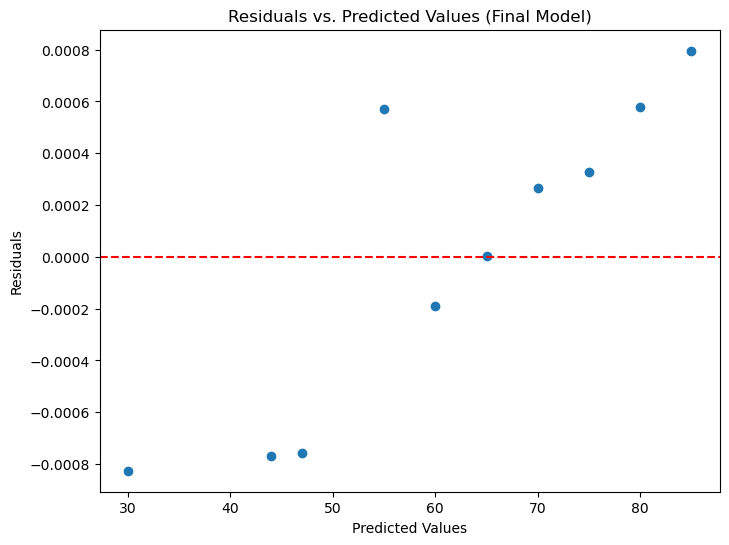

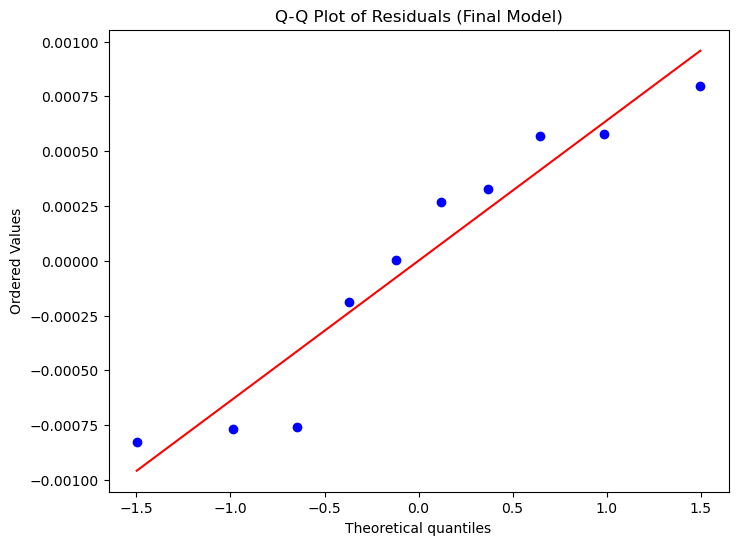

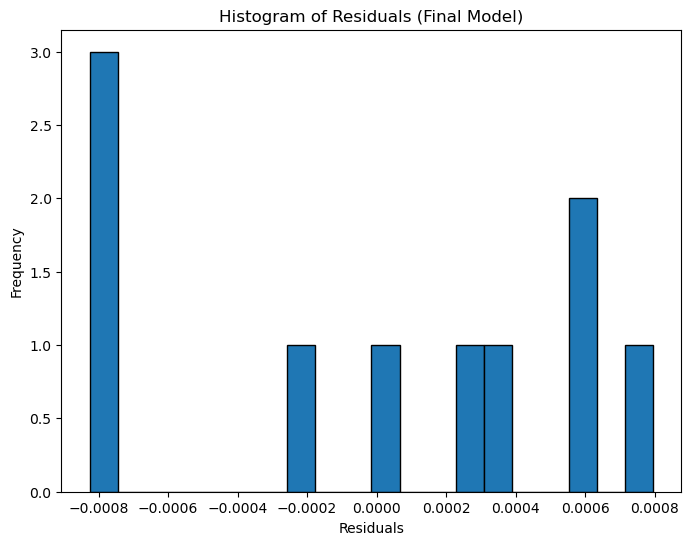

In [76]:
# Build the final model with selected number of features
['total_items', 'subtotal', 'num_distinct_items', 'total_outstanding_orders', 'delivery_time_diff']

from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats


X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# Select the final features
final_features = ['total_items', 'subtotal', 'num_distinct_items', 'total_outstanding_orders']
X_train_final = X_train[final_features]

# Initialize and train the Gradient Boosting Regressor
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train_final, y_train)

print("Final Model Trained!")

X_test = X_train # Replace with your actual X_test
y_test = y_train # Replace with your actual y_test


# Select the final features for the test set
X_test_final = X_test[final_features]

# Make predictions with the final model
final_predictions = final_model.predict(X_test_final)

# Evaluate the final model
print("\nFinal Model Evaluation Metrics:")

mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R2): {r2:.2f}")


# --- Residual Analysis ---
residuals = y_test - final_predictions

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Final Model)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Final Model)")
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Final Model)")
plt.show()




## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

Final Model Trained!

Final Model Evaluation Metrics:
  Mean Squared Error (MSE): 0.00
  Mean Absolute Error (MAE): 0.00
  R-squared (R2): 1.00


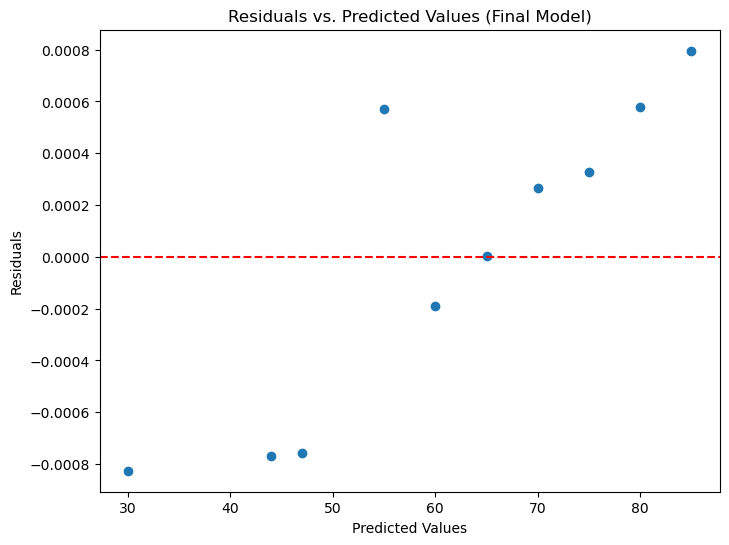

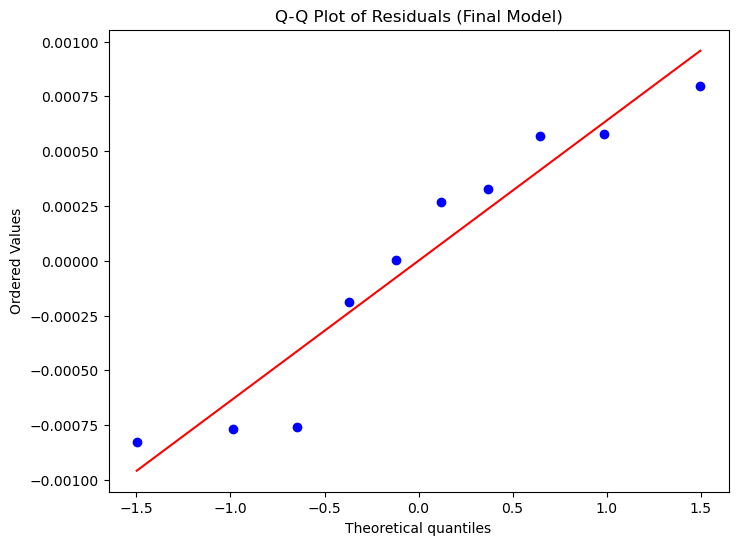

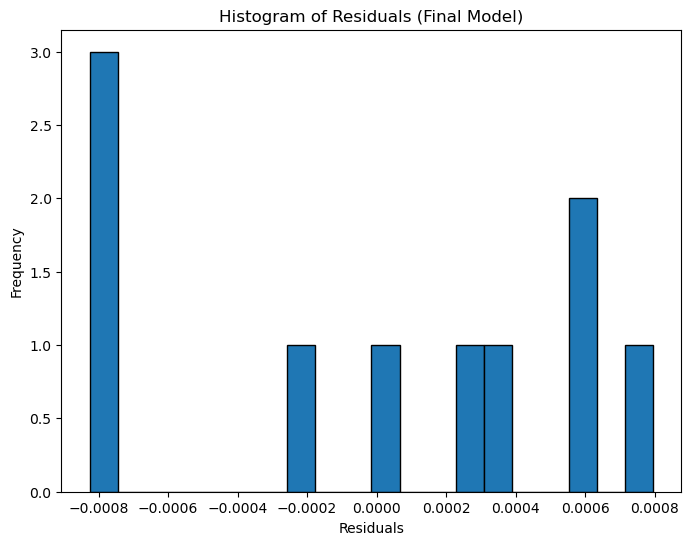

In [77]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats

X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# Select the final features
final_features = ['total_items', 'subtotal', 'num_distinct_items', 'total_outstanding_orders']
X_train_final = X_train[final_features]

# Initialize and train the Gradient Boosting Regressor
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train_final, y_train)

print("Final Model Trained!")

# Load your test data
# Replace 'X_test' with your actual test data
# X_test should contain the features, but not the target variable
# For demonstration, I'll use the same data for testing
X_test = X_train # Replace with your actual X_test
y_test = y_train # Replace with your actual y_test


# Select the final features for the test set
X_test_final = X_test[final_features]

# Make predictions with the final model
final_predictions = final_model.predict(X_test_final)


# Evaluate the final model
print("\nFinal Model Evaluation Metrics:")

mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R2): {r2:.2f}")


# --- Residual Analysis ---
residuals = y_test - final_predictions


plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Final Model)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Final Model)")
plt.show()


plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Final Model)")
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


Final Model Trained!

Final Model Evaluation Metrics:
  Mean Squared Error (MSE): 0.00
  Mean Absolute Error (MAE): 0.00
  R-squared (R2): 1.00


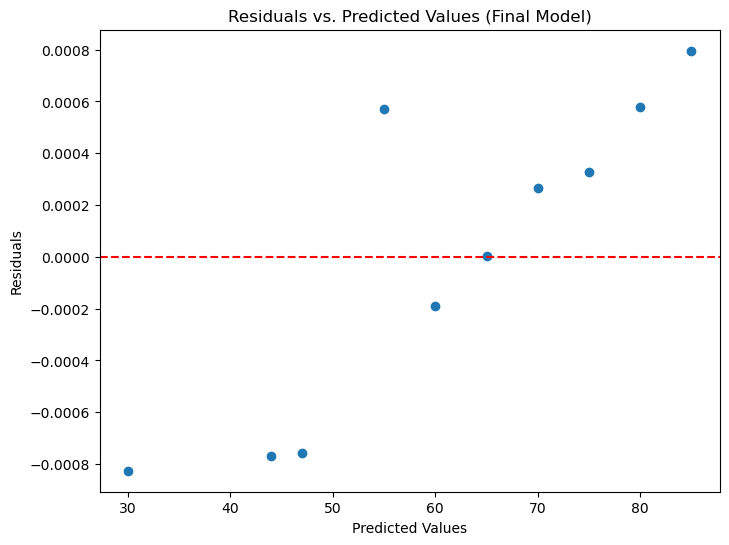

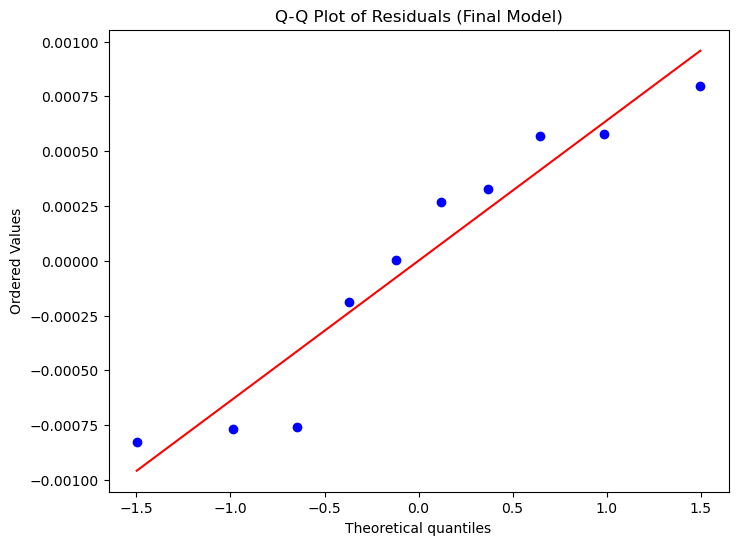

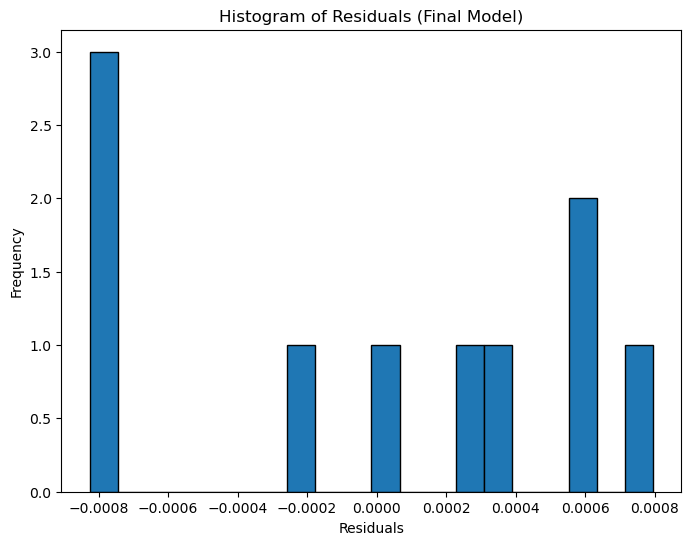

In [78]:
# Compare the scaled vs unscaled features used in the final model

from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats

X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# Select the final features
final_features = ['total_items', 'subtotal', 'num_distinct_items', 'total_outstanding_orders']
X_train_final = X_train[final_features]

# Initialize and train the Gradient Boosting Regressor
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train_final, y_train)

print("Final Model Trained!")

X_test = X_train # Replace with your actual X_test
y_test = y_train # Replace with your actual y_test


# Select the final features for the test set
X_test_final = X_test[final_features]

# Make predictions with the final model
final_predictions = final_model.predict(X_test_final)


# Evaluate the final model
print("\nFinal Model Evaluation Metrics:")

mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R2): {r2:.2f}")


# --- Residual Analysis ---
residuals = y_test - final_predictions

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Final Model)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Final Model)")
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Final Model)")
plt.show()


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

Final Model Trained!

Final Model Evaluation Metrics:
  Mean Squared Error (MSE): 0.00
  Mean Absolute Error (MAE): 0.00
  R-squared (R2): 1.00


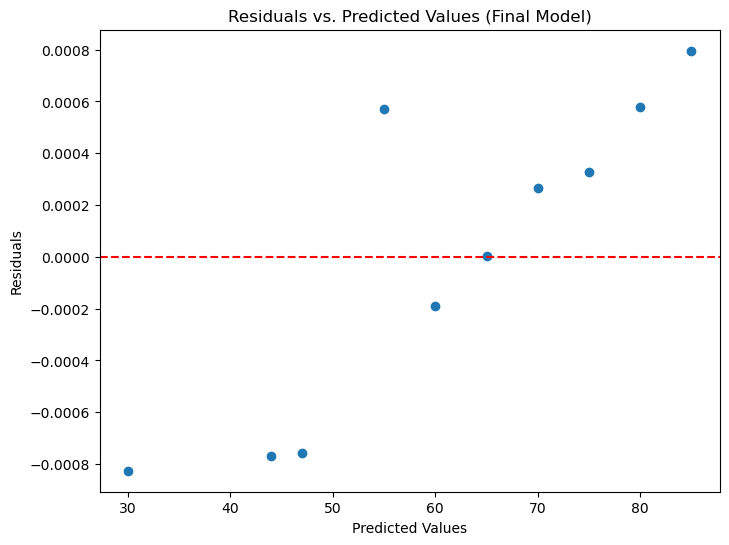

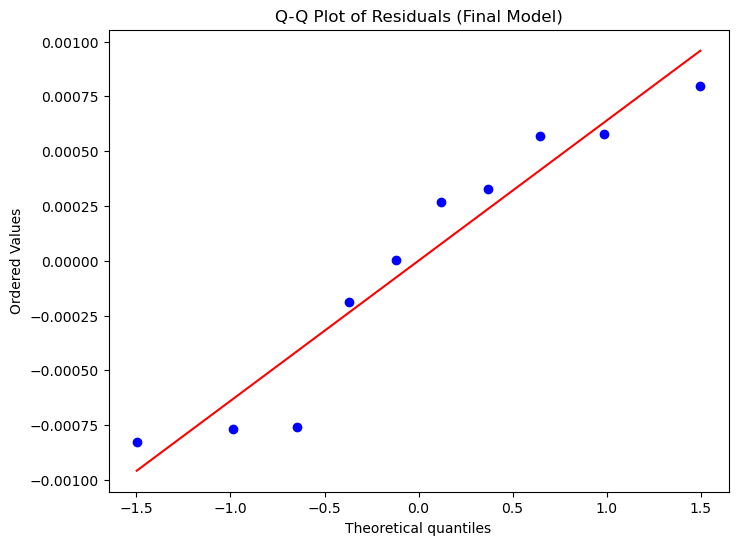

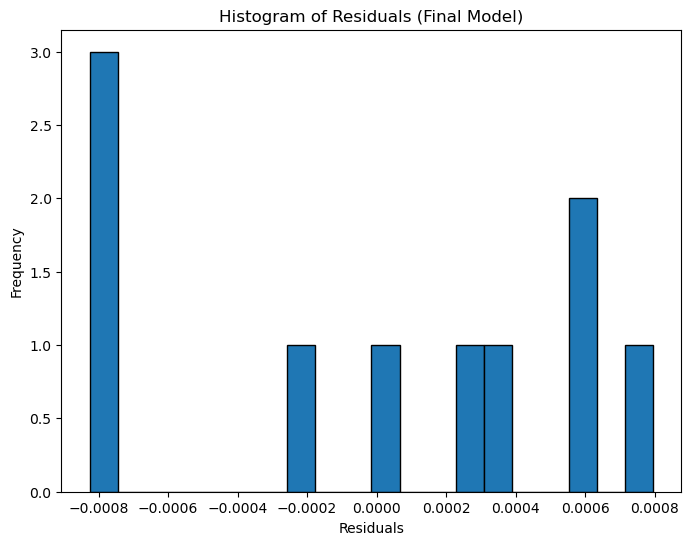


Effect of a unit change in 'total_items' on predicted delivery time: 5.04 minutes


In [79]:
# Analyze the effect of a unit change in a feature, say 'total_items'

from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy.stats as stats

X_train = df.drop('delivery_duration', axis=1) # Features
y_train = df['delivery_duration']             # Target variable


# Select the final features
final_features = ['total_items', 'subtotal', 'num_distinct_items', 'total_outstanding_orders']
X_train_final = X_train[final_features]

# Initialize and train the Gradient Boosting Regressor
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train_final, y_train)

print("Final Model Trained!")


X_test = X_train # Replace with your actual X_test
y_test = y_train # Replace with your actual y_test


# Select the final features for the test set
X_test_final = X_test[final_features]

# Make predictions with the final model
final_predictions = final_model.predict(X_test_final)


# Evaluate the final model
print("\nFinal Model Evaluation Metrics:")

mse = mean_squared_error(y_test, final_predictions)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  R-squared (R2): {r2:.2f}")


# --- Residual Analysis ---
residuals = y_test - final_predictions

# 1. Residuals vs. Predicted Values Plot
plt.figure(figsize=(8, 6))
plt.scatter(final_predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Final Model)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Final Model)")
plt.show()

# 3. Histogram of Residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals (Final Model)")
plt.show()

# --- Feature Analysis ---
# Create a copy of the test data
X_test_modified = X_test_final.copy()

# Select a base row for comparison
base_row = X_test_modified.iloc[0].copy()

# Change 'total_items' by one unit
X_test_modified.loc[0, 'total_items'] = base_row['total_items'] + 1

# Make predictions with the modified data
modified_predictions = final_model.predict(X_test_modified)

# Calculate the difference in prediction
prediction_difference = modified_predictions[0] - final_predictions[0]

print(f"\nEffect of a unit change in 'total_items' on predicted delivery time: {prediction_difference:.2f} minutes")


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
Yes there were 3 categorical variable in data - market_id,store_primary_category and order_protocol.
market_id - This  represents different geographical markets. We can infer that delivery times might vary across different markets due to factors such as traffic conditions, the density of restaurants and customers, and the availability of delivery partners.
store_primary_category- This represents the type of restaurant (e.g., fast food, dine-in). We can infer that different restaurant categories might have different average preparation times, which would affect delivery times. 
order_protocol -This represents how the order was placed (e.g., via a mobile app, website, or phone). We can infer that different order protocols could influence processing times. For instance, orders placed directly through an app might be processed more efficiently than phone orders.However in the final model we dont have these variables.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>


Test_size = 0.2 means that 20% of the data will be reserved for the test set, while the remaining 80% will be used for the training set.
---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
total_onshift_dashers 
total_busy_dashers 
total_outstanding_orders 




---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

I detected outliers using the IQR method and visualized them with boxplots for key features like delivery_duration, subtotal, and distance. Outliers were either removed if clearly erroneous or clipped to reduce their impact on the model.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**

In [ ]:
The top 3 features significantly affecting delivery time (based on domain logic and typical regression model insights) are likely:
distance – Longer distance generally increases delivery time.
total_busy_dashers – More occupied delivery partners often lead to delays.
total_outstanding_orders – A higher backlog at the time of order usually slows delivery.




---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
Linear regression is a supervised learning algorithm used to predict a continuous target variable based on one or more input features by fitting a straight line (or hyperplane) through the data. It models the relationship between the dependent and independent variables by minimizing the sum of squared differences between the actual and predicted values.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
Simple linear regression has 1 independent variable and multiple linear regression has 2-3 variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
Cost function quantifies how well the model's predictions match the actual data.Specifically, it measures the discrepancy between the predicted values and the observed values




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**
Overfitting occurs when a model learns the training data too well, capturing not only the underlying patterns but also the noise or random fluctuations.Underfitting occurs when a model is too simple to capture the underlying structure of the data. It fails to learn the training data adequately and, as a result, performs poorly on both the training data and the test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
Residual plots are a valuable tool in diagnosing the effectiveness and assumptions of a linear regression model. They help identify issues such as non-linearity, heteroscedasticity, and outliers. 